# LoDoPaB-CT HDF5 EXTRACTING NOTEBOOK
This notebook aims to extract the data from hdf5 file that contains CT tomography data

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

### Getting a sinogram

['data']
(128, 1000, 513)
float32


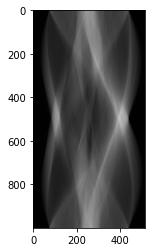

In [6]:
# Assign filename: file
sin_file = '/home/paul/Documents/Florent/HDSPinternship/LoDoPaB-CT_dataset/observation_test/observation_test_000.hdf5'

# Load file: data
sin_data = h5py.File(sin_file, 'r')
print(list(sin_data.keys())) 

sin_dset = sin_data['data']

print(sin_dset.shape)
print(sin_dset.dtype)

plt.imshow(sin_dset[95,:,:], cmap='gray')

#plt.imsave('sinogram27.png', sin_dset[1,:,:], cmap='gray')

Axes must be changed, not the good range

## Radon transform 
Allows us to get a sinogram from an image

['data']


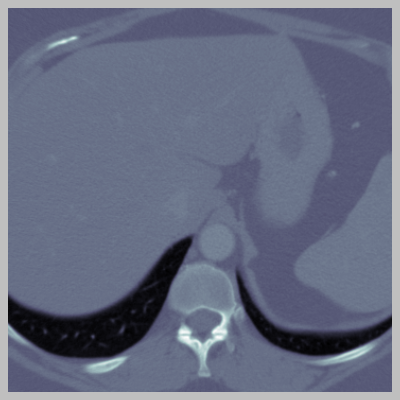

In [15]:
from skimage.transform import radon, iradon, resize
from skimage.color import gray2rgb

img_data = h5py.File('/home/paul/Documents/Florent/HDSPinternship/LoDoPaB-CT_dataset/ground_truth_test/ground_truth_test_000.hdf5', 'r')
print(list(img_data.keys())) 
img_dset = img_data['data']
image = img_dset[0,:,:]
#plt.imsave('image6.png', image, cmap='gray')
#theta = np.linspace(0., 180., 360, endpoint=False)
#print(theta.shape)
plt.imshow(np.transpose(image), cmap='bone'), plt.axis('off')
plt.imsave('reconstruction12.png', np.transpose(image), cmap='bone')
#sinogram = radon(image, theta=theta)
#dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
#plt.subplot(1, 2, 2), plt.imshow(sinogram, cmap='gray')

(362, 362, 4)
(255, 255)
(255, 255)
(255, 255)


(<matplotlib.image.AxesImage at 0x7f23e59a4668>, (-0.5, 511.5, 511.5, -0.5))

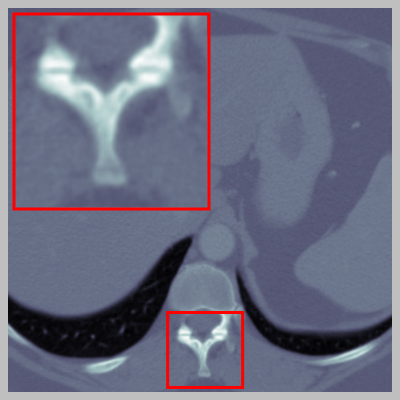

In [71]:
from scipy.ndimage import interpolation
import skimage.io as skio
import matplotlib as mpl
mpl.style.use('classic')
image = skio.imread('/home/paul/Documents/Florent/HDSPinternship/forwards/reconstruction1.png')
print(image.shape)
image = resize(image, (512,512))
#image = np.reshape(image, (512,512,1))
image1 = gray2rgb(image)

def RGBZoom(X):
    y1 = [408, 503]
    x1 = [215, 310]   
    for i in range(3):
        Y = interpolation.zoom(X[y1[0]:y1[1],x1[0]:x1[1],i],255/95) 
        print(Y.shape)  
        X[10:265,10:265,i] = Y
    w = 4
    y = [10, 265]
    x = [10, 265]
    X[y[0]-w:y[0],x[0]-w:x[1]+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]:y[1]+1+w,x[0]-w:x[0],0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    
    w = 4
    y =y1
    x =x1
    X[y[0]-w:y[0],x[0]-w:x[1]+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[0]-w:y[0],x[0]-w:x[1]+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]:y[1]+1+w,x[0]-w:x[0],0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]:y[1]+1+w,x[0]-w:x[0],2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,0] = np.ones(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,1] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    X[y[1]+1:y[1]+w+1,x[0]:x[1]+w+1,2] = np.zeros(shape=(w,x[1]-x[0]+w+1))
    
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,0] = np.ones(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,1] = np.zeros(shape=(y[1]-y[0]+w+1,w))
    X[y[0]-w:y[1]+1,x[1]+1:x[1]+w+1,2] = np.zeros(shape=(y[1]-y[0]+w+1,w))
            
            
    return X

image = RGBZoom(image)
#image = skio.imread('/home/paul/Documents/Florent/HDSPinternship/SDIP/zoom_reconstruction1.png')
plt.imshow(image, cmap='bone'), plt.axis('off')

## Inverse Radon transform 

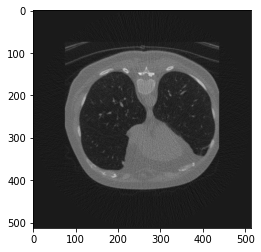

In [28]:
inv_sin = iradon(np.transpose(sin_dset[10,:,:]), theta=None, circle=True)

plt.imshow(inv_sin, cmap='gray')


## Compressed tomography

### Sample x 

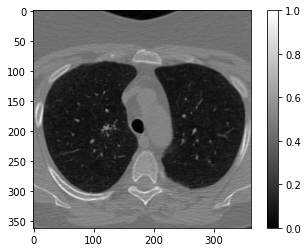

In [18]:
NUM_ANGLES = 18
theta = np.linspace(5., 180., NUM_ANGLES, endpoint=False) # CHECK CHOICE OF THE ANGLES

img_data = h5py.File('LoDoPaB-CT_dataset/ground_truth_test/ground_truth_test_000.hdf5', 'r')
img_dset = img_data['data']
image = img_dset[20,:,:]
image = np.transpose(image)

#plt.imsave('tomography.png', image, cmap='gray')
image = np.float32(image) / np.max(image)
plt.imshow(image, cmap='gray')
plt.colorbar()

x_sampled = iradon(radon(image, theta=theta, circle=False), theta=theta, circle=False, filter='ramp')

### OpenCV DCT

y = A*x = R(dct2(x)) with x the image and R the Radon transform 

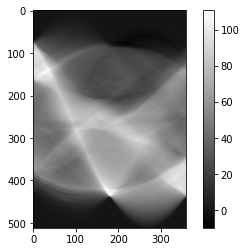

In [3]:
import cv2

dct_image = cv2.dct(cv2.dct(image).T).T

radon_image = radon(dct_image, theta=theta, circle=False)
plt.imshow(radon_image, cmap='gray')
plt.colorbar()


x' = idct2(R^-1(y))

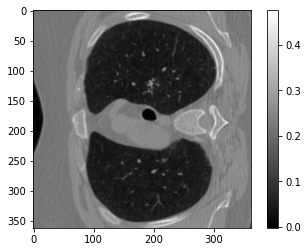

In [4]:
dct_x_reconstructed = cv2.idct(cv2.idct(iradon(radon_image, theta=theta, filter='ramp', circle=False)).T).T
plt.imshow(dct_x_reconstructed, cmap='gray')
plt.colorbar()

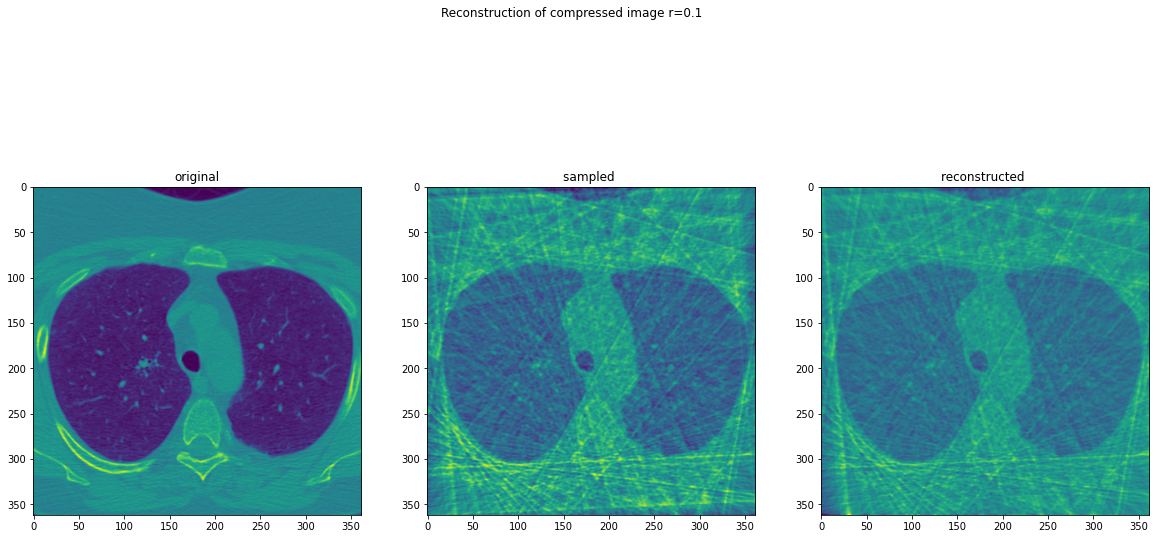

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle("Reconstruction of compressed image r=0.1 ")                         
ax1.imshow(image)
ax1.set_title('original')
ax2.imshow(x_sampled)
ax2.set_title('sampled ' )
ax3.imshow(dct_x_reconstructed)
ax3.set_title('reconstructed ' )
plt.show()

In [23]:
error = dct_x_reconstructed - x_sampled
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

FBP rms reconstruction error: 0.0738


In [24]:
error = dct_x_reconstructed - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

FBP rms reconstruction error: 0.127


### DCT implementation on Tensorflow 

/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/paul/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

(1, 362, 362)
(1, 362, 362)


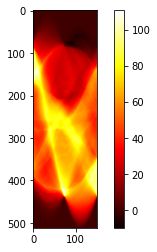

In [5]:
import tensorflow as tf
import skimage.io as skio
NUM_ANGLES = 150
theta = np.linspace(5., 180., NUM_ANGLES, endpoint=False) # CHECK CHOICE OF THE ANGLES
# Convert the image to a TensorFlow tensor
image_tensor = tf.constant(image)

# Reshape the image tensor to add a batch dimension
image_tensor_batched = tf.expand_dims(image_tensor, axis=0)
image_tensor_batched = tf.expand_dims(image_tensor_batched, axis=0)


def dct_2d(
        feature_map,
        norm=None # can also be 'ortho'
):
    feature_map = tf.expand_dims(tf.squeeze(feature_map),axis=0)
    print(feature_map.shape)
    X1 = tf.transpose(tf.signal.dct(feature_map, type=2, norm=norm), perm=[0, 2, 1])
    X2 = tf.signal.dct(X1, type=2, norm=norm)
    X2_t = tf.transpose(X2, perm=[0, 2, 1])
    return X2_t

dct_tensor = dct_2d(image_tensor_batched, norm='ortho')
dct_tensor = dct_2d(dct_tensor, norm='ortho')

# Remove the batch dimension and convert the result to a NumPy array
dct_array = tf.squeeze(dct_tensor)

with tf.compat.v1.Session() as sess:
    array = sess.run(dct_array)
y = radon(array, theta=theta, circle=False)
plt.imshow(y, cmap='hot')
plt.colorbar()


### Inverse DCT on Tensorflow and recovery

In [77]:

def idct_2d(feature_map, norm=None):
    X1 = tf.signal.idct(feature_map, type=2, norm=norm)
    X1_t = tf.transpose(X1, perm=[0, 1, 3, 2])
    X2 = tf.signal.idct(X1_t, type=2, norm=norm)
    X2_t = tf.transpose(X2, perm=[0, 1, 3, 2])
    return X2_t


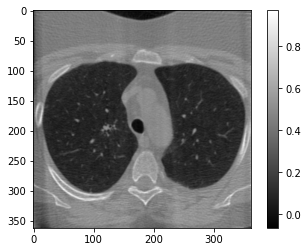

In [78]:
x_hat = iradon(y, theta=theta, filter='ramp', circle=False)
x_hat = tf.cast(tf.expand_dims(tf.expand_dims(x_hat, axis=0), axis=0),dtype=tf.float32)
x_hat = idct_2d(x_hat, norm='ortho')
x_hat = idct_2d(x_hat, norm='ortho')
with tf.compat.v1.Session() as sess:
    x_hat = sess.run(tf.squeeze(x_hat))
plt.imshow(x_hat, cmap='gray')
plt.colorbar()


### 2D DCT homemade class

In [275]:
from keras.layers import *
from keras.models import Model
class dct2d(Layer):
    """
    Image projection layer.
    prj_angles: a list of angles
    """

    def __init__(self, **kwargs):
        super(dct2d, self).__init__(**kwargs)

    def build(self, input_shape):
        super(dct2d, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        prj_out = None
        dct_tensor = cv2.dct(cv2.dct(x).T)
            # sum image in one direction
        if prj_out == None:
            prj_out = tf.reduce_sum(dct_tensor, axis=1, keepdims=True)
        else:
            prj_out = tf.concat((prj_out, tf.reduce_sum(dct_tensor, axis=1, keepdims=True)), axis=1)
        return prj_out

def model_dct(input_size=(362,362,1)):
    img_in = Input(input_size)
    my_layer = dct2d()
    prj_out = my_layer(img_in)

    model = Model(inputs=img_in, outputs=prj_out)
    return model

#img = np.reshape(image, (1, 362, 362, 1))
#prj_model = model_dct()
#y = prj_model.predict(img)
#plt.imshow(y[0, :, :, 0], cmap = 'gray')


## System matrix implementation on tensorflow

### Radon transform class

ok
(512, 512)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 362, 362, 1)]     0         
_________________________________________________________________
image_prj_16 (image_prj)     (1, 180, 512, 1)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


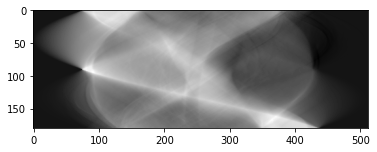

In [24]:
class image_prj(tf.keras.layers.Layer):
    """
    Image projection layer.
    prj_angles: a list of angles
    """

    def __init__(self, prj_angles=(0,180,270), **kwargs):
        self.prj_angles = prj_angles
        super(image_prj, self).__init__(**kwargs)

    def build(self, input_shape):
        super(image_prj, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        input_shape = [362, 362]
        diagonal = np.sqrt(2) * max(input_shape)
        pad = [int(np.ceil(diagonal - s)) for s in input_shape]
        new_center = [(s + p) // 2 for s, p in zip(input_shape, pad)]
        old_center = [s // 2 for s in input_shape]
        pad_before = [nc - oc for oc, nc in zip(old_center, new_center)]
        pad_width = [(pb, p - pb) for pb, p in zip(pad_before, pad)]
        
        pad_width = tf.constant(pad_width)
        x_reshape = tf.reshape(x, [362, 362])
        #padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
        padded_image = tf.pad(x_reshape, pad_width, mode='constant', constant_values=0)
        print("ok")
        print(padded_image.shape)
        if padded_image.shape[0] != padded_image.shape[1]:
            raise ValueError('padded_image must be a square')
        
        padded_image = tf.expand_dims(padded_image, axis=0)
        padded_image = tf.expand_dims(padded_image, axis=-1)

        prj_out = None
        for i in range(0,len(self.prj_angles)):
            # extract an angle
            angle = self.prj_angles[i]*np.pi/180
            # rotate image by angle
            imgRot= tf.contrib.image.rotate(padded_image, angle, interpolation='NEAREST')
            # sum image in one direction
            if prj_out == None:
                prj_out = tf.reduce_sum(imgRot, axis=1, keepdims=True)
            else:
                prj_out = tf.concat((prj_out, tf.reduce_sum(imgRot, axis=1, keepdims=True)), axis=1)
        return prj_out


"""
********* Test "image_prj" layer **********
"""

def prj(input_size = (362, 362, 1), angles=(0, 1, 2, 3, 4, 5, 6, 7)):
    img_in = tf.keras.Input(input_size)
    prj_out = image_prj(prj_angles=angles)(img_in)

    model = tf.keras.Model(inputs=img_in, outputs=prj_out)
    model.summary()
    return model

sz_x, sz_y = 362,362
array = np.reshape(array, (1, sz_x, sz_y, 1))
angles = range(0,180,1)
prj_model = prj((sz_x,sz_y, 1),angles)
y = prj_model.predict(array)
plt.figure()
plt.imshow(y[0, :, :, 0], cmap = 'gray')



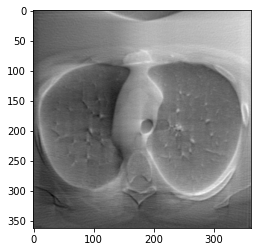

In [25]:
reconstructed_radon = iradon(y[0, :, :, 0].T, theta=angles, circle=False).T
plt.imshow(reconstructed_radon, cmap = 'gray')


In [130]:
angle = tf.convert_to_tensor(angles)
cos_a, sin_a = tf.math.cos(angle),tf.math.sin(angle)
print(cos_a)

Tensor("Cos:0", shape=(18,), dtype=float64)


(512, 150)


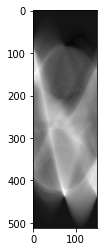

In [10]:
from skimage.transform import warp 
def my_radon(image, theta):

    #image = tf.squeeze(image)
    diagonal = np.sqrt(2) * max(image.shape)
    pad = [int(np.ceil(diagonal - s)) for s in image.shape]
    new_center = [(s + p) // 2 for s, p in zip(image.shape, pad)]
    old_center = [s // 2 for s in image.shape]
    pad_before = [nc - oc for oc, nc in zip(old_center, new_center)]
    pad_width = [(pb, p - pb) for pb, p in zip(pad_before, pad)]
    padded_image = np.pad(image, pad_width, mode='constant',
                      constant_values=0)

    # padded_image is always square
    if padded_image.shape[0] != padded_image.shape[1]:
        raise ValueError('padded_image must be a square')
    center = padded_image.shape[0] // 2
    radon_image = np.zeros((padded_image.shape[0], len(theta)),
                           dtype=image.dtype)

    for i, angle in enumerate(np.deg2rad(theta)):
        cos_a, sin_a = np.cos(angle), np.sin(angle)
        R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],
                      [-sin_a, cos_a, -center * (cos_a - sin_a - 1)],
                      [0, 0, 1]])
        rotated = warp(padded_image, R, clip=False)
        #print(rotated.shape)
        radon_image[:, i] = rotated.sum(0)

    return radon_image

radon_img = my_radon(array, theta)
print(radon_img.shape)
plt.imshow(radon_img, cmap = 'gray')

pad_width:  ((0, 512), (0, 0))
img.shape after padding:  (1024, 150)
radon_filtered.shape:  (512, 150)
t.shape:  (362, 362)
col.shape:  (512,)
x.shape:  (512,)
t [[-164.53605092 -163.53985622 -162.54366152 ...  193.0978457
   194.0940404   195.09023509]
 [-164.62320666 -163.62701196 -162.63081726 ...  193.01068995
   194.00688465  195.00307935]
 [-164.7103624  -163.7141677  -162.71797301 ...  192.92353421
   193.91972891  194.91592361]
 ...
 [-195.82496256 -194.82876787 -193.83257317 ...  161.80893405
   162.80512875  163.80132345]
 [-195.91211831 -194.91592361 -193.91972891 ...  161.72177831
   162.71797301  163.7141677 ]
 [-195.99927405 -195.00307935 -194.00688465 ...  161.63462257
   162.63081726  163.62701196]]
interpolant [[ 1.58535939  1.54244058  1.42599432 ... -0.09689829 -0.20934896
  -0.25902811]
 [ 1.57832334  1.55876658  1.42892037 ... -0.08671407 -0.20283073
  -0.27648727]
 [ 1.57128728  1.57509257  1.43184642 ... -0.08352628 -0.19293609
  -0.2708162 ]
 ...
 [-0.70751255 -

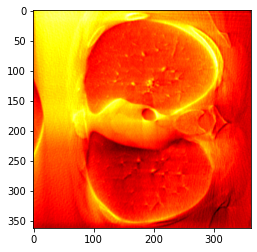

In [19]:
from functools import partial
from scipy.interpolate import interp1d
from scipy.fftpack import fft, ifft

def _get_fourier_filter(size):
    """Construct the Fourier filter.

    This computation lessens artifacts and removes a small bias as
    explained in [1], Chap 3. Equation 61.

    Parameters
    ----------
    size: int
        filter size. Must be even.

    Returns
    -------
    fourier_filter: ndarray
        The computed Fourier filter.

    """
    n = np.concatenate((np.arange(1, size / 2 + 1, 2, dtype=int),
                        np.arange(size / 2 - 1, 0, -2, dtype=int)))
    f = np.zeros(size)
    f[0] = 0.25
    f[1::2] = -1 / (np.pi * n) ** 2

    # Computing the ramp filter from the fourier transform of its
    # frequency domain representation lessens artifacts and removes a
    # small bias as explained in [1], Chap 3. Equation 61
    fourier_filter = 2 * np.real(fft(f))         # ramp filter

    return fourier_filter[:, np.newaxis]


def iradon(radon_image, theta=None, output_size=None, interpolation="linear", circle=False,
           preserve_range=True):
    """Inverse radon transform.

    Reconstruct an image from the radon transform, using the filtered
    back projection algorithm.

    Parameters
    ----------
    radon_image : array
        Image containing radon transform (sinogram). Each column of
        the image corresponds to a projection along a different
        angle. The tomography rotation axis should lie at the pixel
        index ``radon_image.shape[0] // 2`` along the 0th dimension of
        ``radon_image``.
    theta : array_like, optional
        Reconstruction angles (in degrees). Default: m angles evenly spaced
        between 0 and 180 (if the shape of `radon_image` is (N, M)).
    output_size : int, optional
        Number of rows and columns in the reconstruction.
    filter_name : str, optional
        Filter used in frequency domain filtering. Ramp filter used by default.
        Filters available: ramp, shepp-logan, cosine, hamming, hann.
        Assign None to use no filter.
    interpolation : str, optional
        Interpolation method used in reconstruction. Methods available:
        'linear', 'nearest', and 'cubic' ('cubic' is slow).
    circle : boolean, optional
        Assume the reconstructed image is zero outside the inscribed circle.
        Also changes the default output_size to match the behaviour of
        ``radon`` called with ``circle=True``.
    preserve_range : bool, optional
        Whether to keep the original range of values. Otherwise, the input
        image is converted according to the conventions of `img_as_float`.
        Also see https://scikit-image.org/docs/dev/user_guide/data_types.html

    Returns
    -------
    reconstructed : ndarray
        Reconstructed image. The rotation axis will be located in the pixel
        with indices
        ``(reconstructed.shape[0] // 2, reconstructed.shape[1] // 2)``.

    .. versionchanged :: 0.19
        In ``iradon``, ``filter`` argument is deprecated in favor of
        ``filter_name``.

    References
    ----------
    .. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic
           Imaging", IEEE Press 1988.
    .. [2] B.R. Ramesh, N. Srinivasa, K. Rajgopal, "An Algorithm for Computing
           the Discrete Radon Transform With Some Applications", Proceedings of
           the Fourth IEEE Region 10 International Conference, TENCON '89, 1989

    Notes
    -----
    It applies the Fourier slice theorem to reconstruct an image by
    multiplying the frequency domain of the filter with the FFT of the
    projection data. This algorithm is called filtered back projection.

    """
    # Check arguments
    if radon_image.ndim != 2:
        raise ValueError('The input image must be 2-D')

    if theta is None:
        theta = np.linspace(0, 180, radon_image.shape[1], endpoint=False)

    angles_count = len(theta)
    if angles_count != radon_image.shape[1]:
        raise ValueError("The given ``theta`` does not match the number of "
                         "projections in ``radon_image``.")

    interpolation_types = ('linear', 'nearest', 'cubic')
    if interpolation not in interpolation_types:
        raise ValueError("Unknown interpolation: %s" % interpolation)


    # Ensure inputs are floating point
    #radon_image = convert_to_float(radon_image, preserve_range)
    dtype = radon_image.dtype

    img_shape = radon_image.shape[0]
    if output_size is None:
        # If output size not specified, estimate from input radon image
        if circle:
            output_size = img_shape
        else:
            output_size = int(np.floor(np.sqrt((img_shape) ** 2 / 2.0))) # 


    # Resize image to next power of two (but no less than 64) for
    # Fourier analysis; speeds up Fourier and lessens artifacts
    projection_size_padded = max(64, int(2 ** np.ceil(np.log2(2 * img_shape))))
    pad_width = ((0, projection_size_padded - img_shape), (0, 0))
    print("pad_width: ", pad_width)
    img = np.pad(radon_image, pad_width, mode='constant', constant_values=0) # size of img is (projection_size_padded=1024 here, angles_count) 
    print("img.shape after padding: ", img.shape)

    # Apply filter in Fourier domain
    fourier_filter = _get_fourier_filter(projection_size_padded)
    projection = fft(img, axis=0) * fourier_filter
    radon_filtered = np.real(ifft(projection, axis=0)[:img_shape, :]) # size of radon_filtered is (img_shape, angles_count)
    print("radon_filtered.shape: ", radon_filtered.shape)

    # Reconstruct image by interpolation
    reconstructed = np.zeros((output_size, output_size),
                             dtype=dtype)
    radius = output_size // 2
    xpr, ypr = np.mgrid[:output_size, :output_size] - radius
    x = np.arange(img_shape) - img_shape // 2

    for col, angle in zip(radon_filtered.T, np.deg2rad(theta)):
        t = ypr * np.cos(angle) - xpr * np.sin(angle)
        print("t.shape: ", t.shape)
        print("col.shape: ", col.shape)
        print("x.shape: ", x.shape)
        if interpolation == 'linear':
            interpolant = partial(np.interp, xp=x, fp=col, left=0, right=0)
        else:
            interpolant = interp1d(x, col, kind=interpolation,
                                   bounds_error=False, fill_value=0)
        print("t", t)
        print("interpolant", interpolant(t))
        reconstructed += interpolant(t)

    #print("reconstructed.shape: ", reconstructed.shape) # size of reconstructed is (output_size, output_size)
    return reconstructed * np.pi / (2 * angles_count)


projection = my_radon(array, theta)

reconstructed_image = iradon(projection, theta, circle=False)
plt.imshow(reconstructed_image, cmap="hot")
plt.show()


In [ ]:
class ForwardSystem(Layer):
    ''' Create the system matrix H for tomography'''
    def __init__(self, prj_angles=(5, 45, 90, 135, 180), input_dim=(512, 512), noise=False, reg_param=0.5, dl=0.5, opt_H=True,
                 name=False, type_reg='sig', sig_param=10, shots=1, batch_size=1, snr=30, **kwargs):
        self.input_dim = input_dim
        self.shots = shots
        self.batch_size = batch_size
        self.noise = noise
        self.dl = dl
        self.Ld = int(self.input_dim[-1] * dl)
        self.opt_H = opt_H
        self.snr = snr
        self.type_reg = type_reg
        self.reg_param = reg_param
        self.sig_param = sig_param
        self.prj_angles = prj_angles
        self.feature_map = tf.constant(np.zeros((1, 1, self.input_dim[0], self.input_dim[1])), dtype=tf.float32, shape=(1, 1, self.input_dim[0], self.input_dim[1]))
        super(ForwardSystem, self).__init__(name=name, **kwargs)   

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.H = self.add_weight(name='H', 
                                    shape=(self.shots, self.input_dim[0], self.input_dim[1], self.Ld),
                                    initializer='uniform',
                                    trainable=self.opt_H)
        super(ForwardSystem, self).build(input_shape)

    def call(self, inputs, **kwargs):
        # input must be batch, channels, height, width 

        # DCT 2D
        X1 = tf.signal.dct(feature_map, type=2, norm='ortho')
        X1_t = tf.transpose(X1, perm=[0, 1, 3, 2])
        X2 = tf.signal.dct(X1_t, type=2, norm='ortho')
        dct_layer = tf.transpose(X2, perm=[0, 1, 3, 2])

        dct_input = dct_layer(inputs)

        # Radon transform
        input_sinogram = None
        for i in range(0,len(self.prj_angles)):
            # extract an angle
            angle = self.prj_angles[i]*np.pi/180
            # rotate image by angle
            imgRot= tf.contrib.image.rotate(dct_input, angle, interpolation='NEAREST')
            # sum image in one direction
            if input_sinogram == None:
                input_sinogram = tf.reduce_sum(imgRot, axis=1, keepdims=True)
            else:
                input_sinogram = tf.concat((input_sinogram, tf.reduce_sum(imgRot, axis=1, keepdims=True)), axis=1)

        y = tf.expand_dims(tf.reduce_sum(tf.multiply(H, input_sinogram), -2), -1)

        return prj_out

        input_sinogram = tf.expand_dims(radon(input), -1) # f decimated 


        if self.noise:
            sigma = tf.reduce_sum(tf.math.pow(y, 2)) / ((M * M * self.batch_size) * 10 ** (self.snr / 10))
            y = y + tf.random.normal(shape=(self.batch_size, M, M, 1, 1), mean=0, stddev=tf.math.sqrt(sigma),
                                     dtype=y.dtype)

        return y, H